# <center><b>Classying Drugs based on Machine Learning<b></center>

---
<a name = Section2></a>
# **1. Problem Statement**
---
- The increasing complexity of the drug landscape has made it **difficult to classify** drugs accurately, leading to confusion and potential risks for patients. 

- This has a **direct impact on patient safety**, as the improper use of medications can lead to adverse events. Furthermore, the lack of unified drug classification makes prescribing, dispensing, and monitoring of drug therapies difficult for healthcare professionals. 

- As such, it is **essential to develop a comprehensive drug classification system** that is both accurate and standardized. Such a system should include age, gender, BP levels, Cholesterol levels, Sodium to potassium ratio to ensure that healthcare professionals are **accurately prescribing and monitoring medications**.

- Additionally, such a **system should be tailored to the specific needs of the patient** and should be easily accessible to both healthcare professionals and patients.


**<h4>Scenario (Hypothetical):</h4>**

- The **government** has recently put into place a new drug classification system. Drugs are now classified into five categories based on the potential risk they pose to public health and safety.

- **Category 1** drugs are considered to be the **most dangerous**, and can only be prescribed by a physician under strict supervision. These drugs are **highly regulated** and require a prescription from a certified physician.

- **Category 2** drugs have a **moderate risk** and can be prescribed by a physician with some restrictions.

- **Category 3** drugs have a **low risk** and can be sold over the counter without a prescription.

- **Category 4** drugs are considered to be **safe** and can be sold without any restrictions.

- **Category 5** drugs are considered to be **generally safe** but may have some potential risks associated with them. They can be sold without a prescription but with certain restrictions.

- The new system is meant to **protect the public from potentially dangerous drugs** and to ensure that those who need access to medication can get it safely and responsibly.

- To tackle this situation of crisis, they have **consulted** a team of **data scientists**. **Consider it's you...**


In [3]:
import pandas as pd                                                 
from pandas_profiling import ProfileReport                         
pd.set_option('display.max_columns', None)                              
pd.set_option('display.max_colwidth', None)                              
pd.set_option('display.max_rows', None)                             
pd.set_option('mode.chained_assignment', None)                      
pd.set_option('display.float_format', lambda x: '%.5f' % x)         
import numpy as np                                                  
import matplotlib.pyplot as plt                                     
from matplotlib.pylab import rcParams                                                                            
import seaborn as sns                                               
%matplotlib inline
from random import randint                                          
from sklearn.preprocessing import StandardScaler                    
from sklearn.feature_selection import SelectFromModel               
from yellowbrick.model_selection import FeatureImportances          
from imblearn.over_sampling import SMOTE                            
from sklearn.metrics import precision_recall_curve                  
from sklearn.metrics import classification_report                   
from sklearn.metrics import plot_confusion_matrix                   
from sklearn.model_selection import train_test_split                    
from sklearn.naive_bayes import GaussianNB                          
from sklearn.ensemble import RandomForestClassifier                 
import warnings                                                     
warnings.filterwarnings("ignore")                                   

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


---
<a name = Section4></a>
# **2. Data Acquisition & Description**
---

- This data set presents **records** of the **patients** and can be retrieved from the attached <a href = "https://www.kaggle.com/datasets/prathamtripathi/drug-classification">**link**</a>.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 200 | 6 | 50.8 Kb| 

<br>

| Id | Features | Description |
| :-- | :--| :--| 
|01| **Age** | Age of the patient|
|02| **Sex** | Gender of the patient | 
|03|**BP**| BP level of the patient |
|04|**Cholesterol**| Cholesterol level of the patient |
|04|**Na_to_K**| Sodium to Potassium Ratio |
|04|**Drug**| Name of the drug (Target Variable)|

In [5]:
data = pd.read_csv('/kaggle/input/drug-classification/drug200.csv')
print('Data Shape:', data.shape)
data.head()

Data Shape: (200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.35500,DrugY
1,47,M,LOW,HIGH,13.09300,drugC
2,47,M,LOW,HIGH,10.11400,drugC
3,28,F,NORMAL,HIGH,7.79800,drugX
4,61,F,LOW,HIGH,18.04300,DrugY


<a name = Section41></a>
### **2.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [6]:
data.describe()

,Age,Na_to_K
count,200.00000,200.00000
mean,44.31500,16.08449
std,16.54431,7.22396
min,15.00000,6.26900
25%,31.00000,10.44550
50%,45.00000,13.93650
75%,58.00000,19.38000
max,74.00000,38.24700


**Observation:**

- The **average** age is 44 and the **maximum** age is 74

- The **Sodium to Potassium Ratio** goes from 6 to 38 with an **average** of 16.

<a name = Section42></a>
### **2.2 Data Information**

- In this section we will see the **information about the types of features**.

In [7]:
data.info(verbose = True, memory_usage = 'deep', null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 50.8 KB


**Observation:**

- There is **no null data present** inside our data set.

- **Each feature** seems to have **correct data type**.

<a name = Section5></a>

---
# **3. Data Pre-Processing**
---

<a name = Section51></a>
### **3.1 Pre Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

**Observation:**

- Report show that there are **6 features** out of which **4 are categorical** and **2 are numerical**.

- There is **no missing data**.

- For full details checkout the report.

**Performing Operations**

In [9]:
before_shape = data.shape
print('Data Shape [Before]:', before_shape)

data.drop_duplicates(inplace = True)

after_shape = data.shape
print('Data Shape [After]:', after_shape)

drop_nums = before_shape[0] - after_shape[0]
drop_percent = np.round(drop_nums / before_shape[0], decimals = 5) * 100

print('Drop Ratio:', drop_percent, '%')

Data Shape [Before]: (200, 6)
Data Shape [After]: (200, 6)
Drop Ratio: 0.0 %


**Observation:**

- There was **no duplicate data**.

<a name = Section6></a>

---
# **4. Exploratory Data Analysis**
---

**<h4>Question: What is the frequency and proportion of drugs?</h4>**

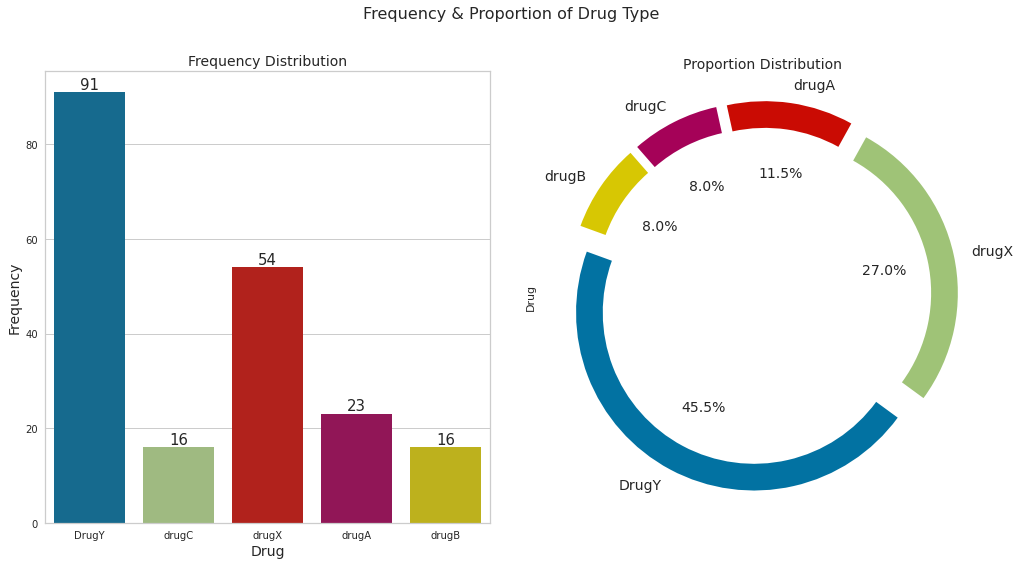

In [10]:
fig = plt.figure(figsize = [15, 8])
plt.subplot(1, 2, 1)
ax = sns.countplot(x = 'Drug', data = data)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
plt.xlabel(xlabel = 'Drug', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)

plt.subplot(1, 2, 2)
space = np.ones(5)/10
data['Drug'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', 
                                 wedgeprops = dict(width=0.15), startangle = 160, figsize = [15, 8], legend = False)
plt.title(label = 'Proportion Distribution', size = 14)
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'Frequency & Proportion of Drug Type', y = 1.02, size = 16)
plt.show()

**Observation:**

- We can **observe class imbalance** in our data set.

- This will pose a **big problem** while **performing model building**, but we **will see what we can do**.

**<h4>Question: What is the distribution of drugs in various cholestoral levels?</h4>**

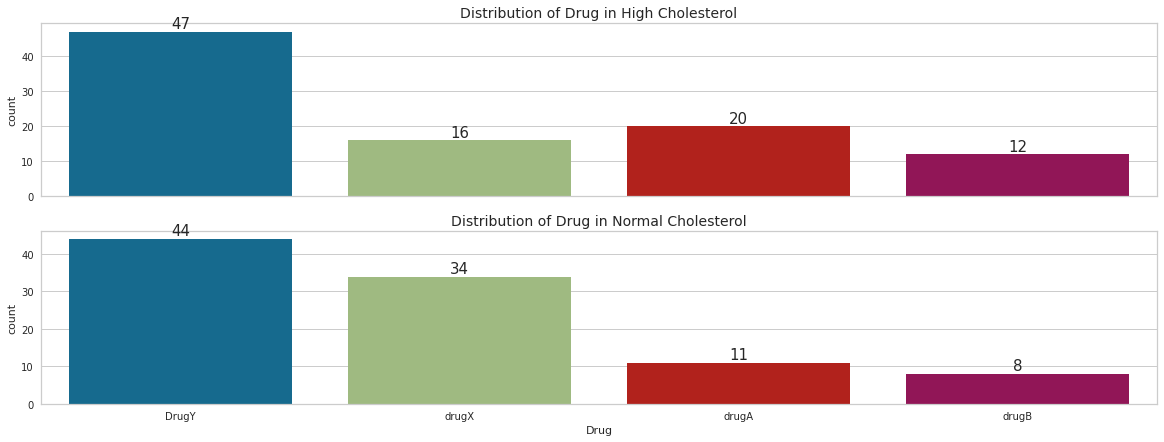

In [11]:
# Plotting the distribution of the sliced data
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (20, 7))
ax1 = sns.countplot(data[data.Cholesterol == 'HIGH'].Drug,  ax = ax1)
ax1.set_title(label = 'Distribution of Drug in High Cholesterol', size = 14)
for bar in ax1.patches:
    ax1.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
ax1.set_xlabel(xlabel = '')
ax2 = sns.countplot(data[data.Cholesterol == 'NORMAL'].Drug,  ax = ax2)
for bar in ax2.patches:
    ax2.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
ax2.set_title(label = 'Distribution of Drug in Normal Cholesterol', size = 14)
plt.show()

**Observations**

- DrugY is being recommended to both people with High and Normal Cholestrol 

-  DrugB is being recommended the least to both people with High and Normal Cholestrol 

- DrugX is being given to people with Normal Cholestrol on 2nd number while DrugA is being given to people with High Cholestrol on 2nd Number

**<h4>Question: What is the distribution of drugs in Males and Females?</h4>**

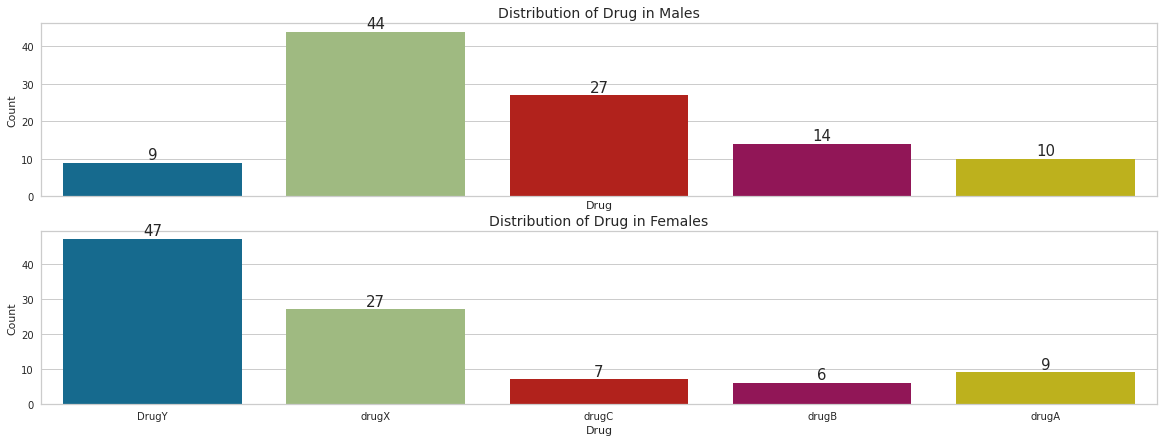

In [12]:
# Plotting the distribution of the sliced data
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (20, 7))
ax1 = sns.countplot(data[data.Sex == 'M'].Drug,  ax = ax1)
ax1.set_title(label = 'Distribution of Drug in Males', size = 14)
for bar in ax1.patches:
    ax1.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
ax1.set_ylabel(ylabel = 'Count')
ax2 = sns.countplot(data[data.Sex == 'F'].Drug,  ax = ax2)
for bar in ax2.patches:
    ax2.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
ax2.set_title(label = 'Distribution of Drug in Females', size = 14)
ax2.set_ylabel(ylabel = 'Count')
plt.show()

**Observations**
-  Males are being given DrugX the most followed by DrugC while DrugY is the least recommended to Males.

- Females are being given DrugY the most followed by DrugX while DrugB is the least recommended to Females.

**<h4>Question: What is the spread of Age and Sodium-to-Potassium Ratio?</h4>**

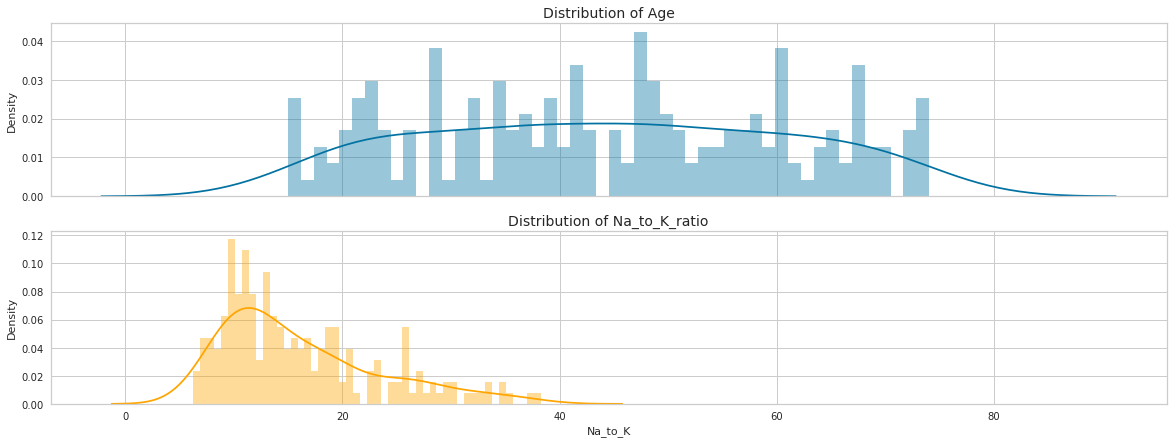

In [13]:
age  = data.Age
Na_to_K_ratio = data.Na_to_K

# Plotting the distribution of the sliced data
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (20, 7))
sns.distplot(a = age, bins = 50, ax = ax1, color = 'C0')
ax1.set_title(label = 'Distribution of Age', size = 14)
sns.distplot(a = Na_to_K_ratio, bins = 50, ax = ax2, color = 'orange')
ax2.set_title(label = 'Distribution of Na_to_K_ratio', size = 14)
plt.show()

**Note:** These are few question we need to analyze before moving further and if you want to dig deeper into this, feel free to do so...

<a name = Section7></a>

---
# **5. Post Data Processing & Feature Selection**
---
- Now we will **perform standardization** and **feed it** to the **Random Forest**.

- **Random Forest** will then **identify important features** for our model **using threshold**.

- This threshold is **used over** the **information gain** which results in **reduction in impurity**.

- And **finally** we will **split** our **data** for the **model development**.

<a name = Section71></a>
### **5.1 Data Standardization**

- Here we will perform standardization over the input features.

In [14]:
#Creating a temp_df for getting the onehotencoding of the object columns
temp_df = pd.get_dummies(data[['Sex', 'BP', 'Cholesterol']])

In [15]:
#Merging the two dataframes
df = temp_df.merge(data, left_index=True, right_index=True)

In [16]:
#initiating the LabelEncoder object
encoder = LabelEncoder()

In [17]:
#fitting and transforming the Target variable
df.Drug = encoder.fit_transform(df.Drug)

In [18]:
df.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,1,0,1,0,0,1,0,23,F,HIGH,HIGH,25.35500,0
1,0,1,0,1,0,1,0,47,M,LOW,HIGH,13.09300,3
2,0,1,0,1,0,1,0,47,M,LOW,HIGH,10.11400,3
3,1,0,0,0,1,1,0,28,F,NORMAL,HIGH,7.79800,4
4,1,0,0,1,0,1,0,61,F,LOW,HIGH,18.04300,0


In [19]:
#Dropping the columns with the object datatype now that OneHotEncoding is done
df = df.select_dtypes(exclude='object')

In [20]:
df.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age,Na_to_K,Drug
0,1,0,1,0,0,1,0,23,25.35500,0
1,0,1,0,1,0,1,0,47,13.09300,3
2,0,1,0,1,0,1,0,47,10.11400,3
3,1,0,0,0,1,1,0,28,7.79800,4
4,1,0,0,1,0,1,0,61,18.04300,0


In [21]:
# Saving all feature names to a list in a variable
dataColumns = ['Age', 'Na_to_K']

#Initiating the StandardScaler object
scaler = StandardScaler()

#transforming only the Age and Na_to_K columns using a for loop
for i in dataColumns:
    df[i] = scaler.fit_transform(df[[i]])

print('Success!')

Success!


In [22]:
df.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age,Na_to_K,Drug
0,1,0,1,0,0,1,0,-1.29159,1.28652,0
1,0,1,0,1,0,1,0,0.16270,-0.41515,3
2,0,1,0,1,0,1,0,0.16270,-0.82856,3
3,1,0,0,0,1,1,0,-0.98861,-1.14996,4
4,1,0,0,1,0,1,0,1.01103,0.27179,0


**Observation:**

- Now that we have **successfully transformed and scaled** our data let's move ahead.

<a name = Section72></a>
### **5.2 Feature Selection using Random Forest**

- Now in **real world**, it is very **rare** that **all** the **features** are **important** while developing the model.

- So **instead** we **analyze** the **impact** of **input over the target** feature.

- We do so by either performing **statistical** **tests** (Pearson, ANOVA, Chi-Square) or by using **Random Forest**.

- **Random forests** are one the most **popular machine learning algorithms** because they **provide**:
 - **a good predictive performance**,
 - **low overfitting and**
 - **easy interpretability.**

- This **interpretability** is **derived** from the **importance of each feature** on the tree decision **evaluated** on the **reduction** in **impurity**.

- In other words, it is **easy to compute** how much **each feature is contributing** to the **decision**.

- **Below** we have **implemented** a function namely, **SelectFromModel** **available** in **Sklearn** which **uses** the **base estimator** to **identify** **important features**.

- The **importance** of feature is **determined** on the **basis** of **threshold** (a measure to calculate feature importance).

In [23]:
#Selecting the X and Y values for model training 
y = df['Drug']
X = df.drop('Drug', axis = 1)

In [24]:
# Have some patience, may take some time :)
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(X, y)

# Extracting list of important features
selected_feat = X.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Features:', selected_feat)

Total Features Selected are 3
Threshold set by Model: 0.11
Features: ['BP_HIGH', 'Age', 'Na_to_K']


**Visualization of Important Features:**

- Below features are plotted against their relative importance (in %age),  of each feature.

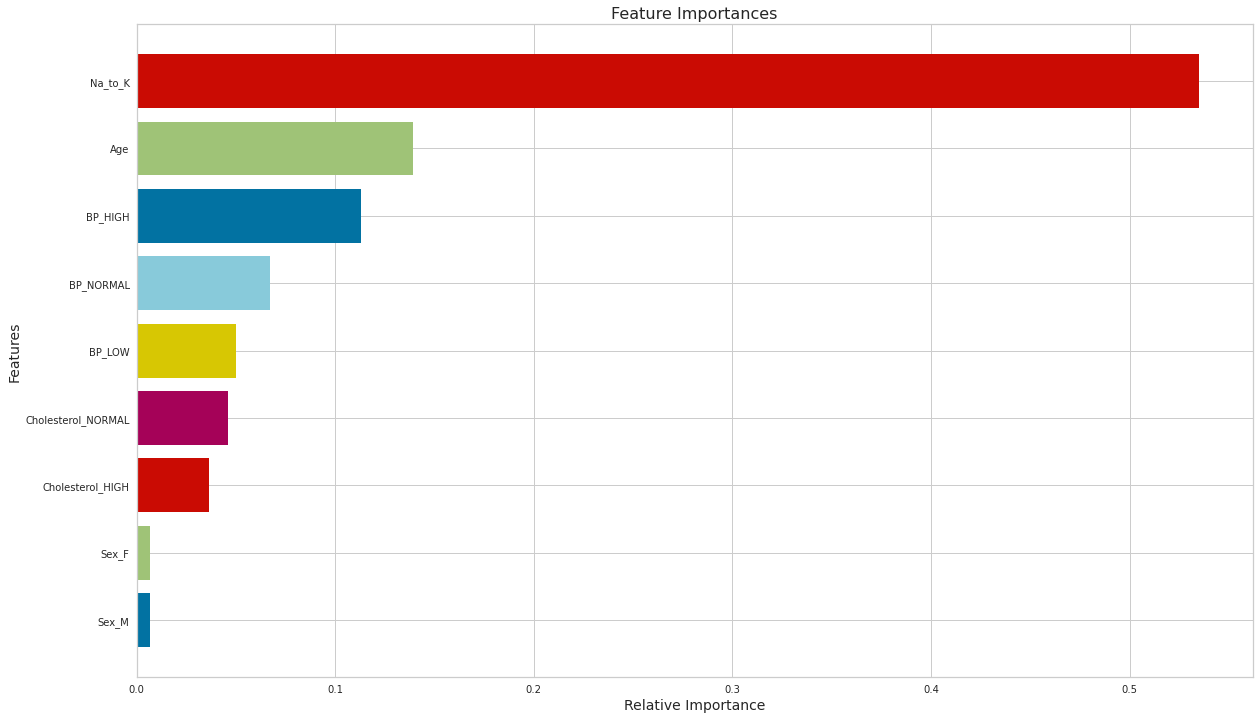

In [25]:
figure = plt.figure(figsize = [20, 12])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative = False)
viz.fit(X, y)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

**Observation:**

- We can observe that random forest has finalized 3 features 

- Now we will move to data preparation for model development.

<a name = Section73></a>
### **5.3 Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

In [26]:
#Creating X values using the 3 columns RandomForest model had selected 
X = df[selected_feat]

In [27]:
#Splitting the data (Ps It is still imbalanced)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42, stratify = y)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (180, 3) (180,)
Testing Data Shape: (20, 3) (20,)


<a name = Section8></a>

---
# **6. Model Development & Evaluation**
---

- In this section we will **develop Gaussian Naive Bayes using important features** and **tune** our **model if required**.

- Then we will **analyze the results** obtained and **make our observation**.

- For **evaluation purpose** we will **focus** on **precision and recall value** for **positive class** i.e. fraudulent class.

- **Remember** that **we want generalize results** i.e. same results or error on testing data as that of training data.

- We will **observer** **whether** the **SMOTE** is **required** or not **because** we want to **focus** on **precision and recall** values of **positive class**.

In [28]:
def plot_precision_recall(y_true, y_pred, train_or_test):
    '''
      y_true: Acutal values of the target
      y_pred: Predicted values of the target. Either predict_proba or decision_function
      line_show: Plot avergae values "precision" or "recall"
      train_or_test: Train Data or Test Data
    '''
    precisions, recalls, thresholds = precision_recall_curve(y_true = y_true, probas_pred = y_pred)
    average_precision = np.mean(precisions)
    average_recall = np.mean(recalls)

    sns.lineplot(x = recalls, y = precisions, linewidth = 2, ci = None)
    plt.plot([0, 1], [average_precision, average_precision], 'r-')
    plt.plot([average_recall, average_recall], [0, 1], 'g-')
    plt.xlabel('Recall', fontsize = 14)
    plt.xticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    plt.yticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    plt.ylabel('Precision', fontsize = 14)
    plt.title(train_or_test, fontsize = 16)
    plt.legend(labels = ['Binary PR Curve', 'AP {:.2f}'.format(average_precision), 'AR {:.2f}'.format(average_recall)])
    plt.grid(True)

<a name = Section81></a>

## **6.1 Naive Bayes - Baseline Model**

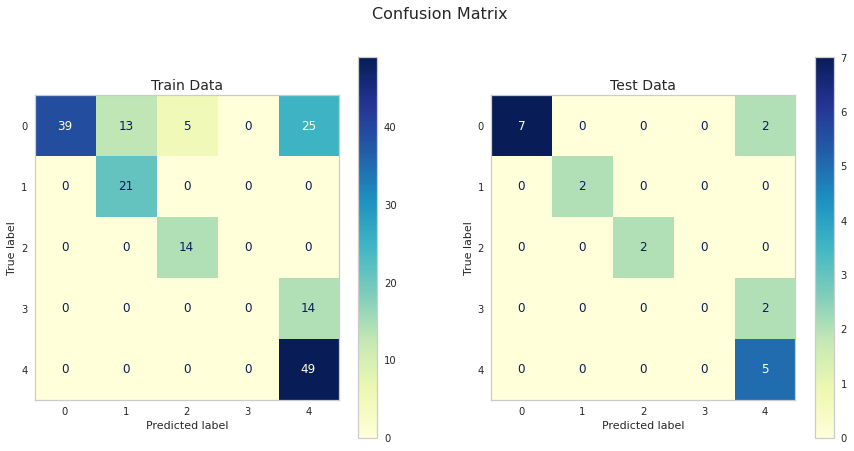

In [29]:
naive = GaussianNB()
naive.fit(X_train, y_train)

y_train_pred_count = naive.predict(X_train)
y_test_pred_count = naive.predict(X_test)

y_train_pred_proba = naive.predict_proba(X_train)
y_test_pred_proba = naive.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = naive, X = X_train, y_true = y_train, values_format = '.7g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = naive, X = X_test, y_true = y_test, values_format = '.7g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

**Observation:**

- **Train Data:**
  - Model is making maximum misclassification in Drug 1 and Drug 5

- **Test Data:**
  - Model is making maximum misclassification in Drug 1 and Drug 5

In [30]:
def ClassificationReport(y_train, y_train_pred_count):
    logistic_report_train = classification_report(y_train, y_train_pred_count)
    logistic_report_test = classification_report(y_test, y_test_pred_count)
    print('                    Training Report          ')
    print(logistic_report_train)
    print('                    Testing Report           ')
    print(logistic_report_test)

In [31]:
ClassificationReport(y_train, y_train_pred_count)

                    Training Report          
              precision    recall  f1-score   support

           0       1.00      0.48      0.64        82
           1       0.62      1.00      0.76        21
           2       0.74      1.00      0.85        14
           3       0.00      0.00      0.00        14
           4       0.56      1.00      0.72        49

    accuracy                           0.68       180
   macro avg       0.58      0.70      0.59       180
weighted avg       0.74      0.68      0.64       180

                    Testing Report           
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         2
           4       0.56      1.00      0.71         5

    accuracy                           0.80        20
   macro avg       0.71      0.76      

**Observation:**

- The **precision** score is pretty **low** in both **training** data as well as on **testing** data.

<a name = Section82></a>

## **6.2 SMOTE Technique & its Implementation**

- SMOTE refers to **Synthetic Minority Oversampling Technique**.

- It **aims** to **balance class distribution** by **randomly** **increasing minority class** examples **by replicating** them. 

- It **synthesises** **new minority instances** **between** **existing** minority **instances**. 

- **It generates the virtual training records by linear interpolation for the minority class.** 

- These synthetic training **records** are **generated** by **randomly** selection*.

- It is performed by one or more of the k-nearest neighbors for each **example in the minority class**. 

- **After** the **oversampling process**, the **data is reconstructed** and several classification models can be applied for the processed data.

<br> 
**<center><h3>Working of SMOTE</h3></center>**

<center><img src = "https://raw.githubusercontent.com/insaid2018/Term-3/master/Images/SMOTE.gif"></center>

**Before Implimenting SMOTE**

In [32]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (180, 3) (180,)
Testing Data Shape: (20, 3) (20,)


**Performing SMOTE Operation**

In [33]:
# Have some patience, may take some time

sm = SMOTE(random_state = 42)
X1, y1 = sm.fit_resample(X, y)

X_new = pd.DataFrame(data = X1, columns = X.columns)

#splitting the data post SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_new, y1, test_size = 0.2, random_state = 42, stratify = y1)

In [34]:
# Target Sample Verification
pd.Series(y1).value_counts()

0    91
3    91
4    91
1    91
2    91
Name: Drug, dtype: int64

Voila!! The class imbalance in the dataset has disappeared, making it much easier for the model to NOT make any biased decisions.

**After Implimenting SMOTE**

In [35]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (364, 3) (364,)
Testing Data Shape: (91, 3) (91,)


<a name = Section83></a>

## **6.3 Naive Bayes - Oversampled Model**

In this model, we will use the Oversampled Data that we obtained after performing SMOTE.

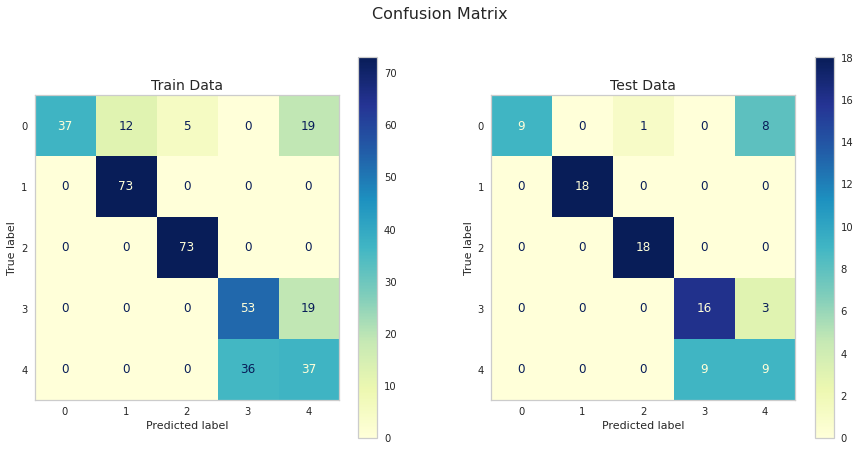

In [36]:
naive = GaussianNB()
naive.fit(X_train, y_train)

y_train_pred_count = naive.predict(X_train)
y_test_pred_count = naive.predict(X_test)

y_train_pred_proba = naive.predict_proba(X_train)
y_test_pred_proba = naive.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = naive, X = X_train, y_true = y_train, values_format = '.7g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = naive, X = X_test, y_true = y_test, values_format = '.7g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

**Observation:**

- **Train Data:**
  - Now the model is making less error on Drug 1 and Drug 5 but making more errors on Drug 2 and 3.

- **Test Data:**
  - Now the model is making less error on Drug 1 and Drug 5 but making more errors on Drug 2 and 3.

In [37]:
logistic_report_train = classification_report(y_train, y_train_pred_count)
logistic_report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(logistic_report_train)
print('                    Testing Report           ')
print(logistic_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       1.00      0.51      0.67        73
           1       0.86      1.00      0.92        73
           2       0.94      1.00      0.97        73
           3       0.60      0.74      0.66        72
           4       0.49      0.51      0.50        73

    accuracy                           0.75       364
   macro avg       0.78      0.75      0.74       364
weighted avg       0.78      0.75      0.74       364

                    Testing Report           
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        18
           1       1.00      1.00      1.00        18
           2       0.95      1.00      0.97        18
           3       0.64      0.84      0.73        19
           4       0.45      0.50      0.47        18

    accuracy                           0.77        91
   macro avg       0.81      0.77      

**Observation:**

- We can **observe** that how **better** our **metrics** are **looking now**.

- The **precision** and **recall** **scores** have been **improved** for the **positive class**.


**Note:** You can try out other models with respect to the Naive Bayes and find much better solution.

<a name = Section9></a>

---
# **7. Conclusion**
---

- We **studied in breifly about the data**, its **characteristics** and its **distribution**.
- We **explored** some **questions related** to fraudulent and non-fraudulent transactions.
- We **investigated in depth about the features** which to **retain** and which to **discard**.
- We **performed model development** **with and without oversampling technique** known as SMOTE.
- We **observed low precision and recall scores** with **baseline model** but **good results with oversampled model**.
- This **model** now can **help us** in **identifying** which transactions are fraudulent and which are not. 
- Additionally, this **model** will **help** business **saving** **a lot of resources** (money, human resources etc.).